# Virtual Internship - ANZ Transactions Dataset

This dataset contains 3 months of transactions history for 100 hypothetical customers provided by Data ANZ company .
https://www.theforage.com/modules/ZLJCsrpkHo9pZBJNY/BiJPfqmGY2QwgN6gA

# Objectives:

1)To perform exploratory data analysis on the above dataset and draw insights from the information provided in it.
2)Building a regression and a decision-tree prediction model to predict the annual salary of the customers whose salaries were credited to their accounts.

# Features:

1)status : the status of the transaction i.e posted or authorized for each transaction.
2)card_present_flag : whether the transaction was done by card or not (1= Yes and 0 = No).
3)bpay_biller_code : unique code of the BPay Transaction done by the customers.
4)account : account number of the customers.
5)currency : currency type (Australian Dollars).
6)long_lat : Longitude and Latitude location of the customers.
7)txn_description : the mode of transaction the customers have done.
8)merchant_id : the merchant id where the customers had done their transactions.
9)merhant_code : unique merchant code of the merchants.
10)first_name : first name of the customers.
11)balance : balance of the customers during each transaction.
12)date : date on which the transaction took place.
13)gender : gender of the customers (Male or Female).
14)age : age of the customers.
15)merchant_suburb : the area where the merchants' business stores are located.
16)merchant_state : the state where the merchants' stores are located.
17)extraction : date and time of each transaction.
18)amount : the amount transacted by the customers.
19)transaction_id : unique transaction id given by the merchant when the customer makes a transaction.
20)country : country where the customers belong to.
21)customer_id = unique id of each customer.
22)merchant_long_lat : the latitude and longitude location of the merchants.
23)movement : how the transaction is made (credit or debit).

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the excel file

data=pd.read_excel(r"C:\Users\Dipanjan Dey Sarkar\Downloads\ANZ synthesised transaction dataset.xlsx")

In [3]:
#First five rows of the dataset

data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#Number of rows and columns in the dataset

data.shape

(12043, 23)

In [5]:
#Columns present and their datatypes

data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [6]:
#Converting the extraction column to datetime and days of the date of transactions in a seperate column

data['extraction']=pd.to_datetime(data['extraction'])
data['day_name'] = data['date'].dt.day_name()

In [7]:
#Viewing the column after conversion to datetime format

data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day_name
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday


In [8]:
#Summarizing the distribution of the dataset 

data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [9]:
#Counting the number of categories in the country column
data['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [10]:
#Counting the categories and their occurences in status column
print(data['status'].value_counts())
data['status'].value_counts(normalize=True)


authorized    7717
posted        4326
Name: status, dtype: int64


authorized    0.640787
posted        0.359213
Name: status, dtype: float64

In [11]:
data['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [12]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [13]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [14]:
data['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
a0477f9c-ace4-4a03-9553-0e2b0b9080c8     1
897c9336-d7d7-40aa-81d1-4d68b79ad71b     1
feb098d1-9a5b-46e0-a09a-5ecb1316eabf     1
41fb71c5-8af3-4330-be97-11c7334b694f     1
c43b9034-b67b-41f8-b5eb-b019056a3387     1
Name: merchant_id, Length: 5725, dtype: int64

In [15]:
data['merchant_suburb'].value_counts()

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Nambour               1
Caboolture South      1
Park Grove            1
North Turramurra      1
Glenreagh             1
Name: merchant_suburb, Length: 1609, dtype: int64

In [16]:
data['merchant_state'].value_counts()


NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [17]:
data['merchant_long_lat'].value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
151.02 -33.95      1
151.03 -33.7       1
153.54 -27.43      1
130.88 -12.36      1
138.52 -35.01      1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [18]:
data['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [19]:
#Checking the number of missing values in each column

data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
day_name                 0
dtype: int64

In [20]:
data.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)
#Dropping the two columns with more than 11158 missing values out of 12063 total data present

In [21]:
#Imputing the missing values feature-wise
#Dropping merchant_id, merchant_suburb and merchant_long_lat columns having 4326 missing values each and 5725,1609 and 2703 categories respectively.
#Imputing card_present_flag column with its median and merchant_state column with its mode

data.drop(['merchant_id','merchant_suburb','merchant_long_lat'],axis=1,inplace=True)
data['card_present_flag']=data['card_present_flag'].fillna(data['card_present_flag'].median())
data['merchant_state']=data['merchant_state'].fillna(data['merchant_state'].mode()[0])

In [22]:
#Checking the shape of the dataset after imputing the missing values

data.shape

(12043, 19)

# Exploratory Data Analysis

In [23]:
#Dropping the duplicate values from customer_id column and printing its range
x=data['customer_id'].drop_duplicates()
print("Total number of customers:",len(x))
fc=data['customer_id'].min()
lc=data['customer_id'].max()
print("Customer id ranges from {} to {}".format(fc,lc))

Total number of customers: 100
Customer id ranges from CUS-1005756958 to CUS-883482547


In [24]:
#Grouping the data by customer_id and displaying the sum of amount and balance alongwith the number of transactions done by them
data_cus=data.groupby('customer_id').agg({'amount': lambda x: x.sum(),'balance': lambda x:x.sum(),'account':lambda x:len(x)})
data_cus.head()

,amount,balance,account
customer_id,,,
CUS-1005756958,16268.97,166137.20,73
CUS-1117979751,33984.37,982992.90,100
CUS-1140341822,17010.60,455936.98,80
CUS-1147642491,28980.82,1065875.26,118
CUS-1196156254,36050.72,5456746.27,245


In [25]:
#Customer_id of The customer who has the maximum transaction amount in 3 months
data_cus['amount'].max()
max_purchased_cus=data_cus[data_cus['amount']==45409.16]
print(max_purchased_cus)
data[data['customer_id']=='CUS-2738291516'].head(1)

                  amount    balance  account
customer_id                                 
CUS-2738291516  45409.16  902937.16       80


,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,day_name
271,authorized,0.0,ACC-3317636250,AUD,153.02 -27.66,POS,Kenneth,147.58,2018-08-02,M,35,WA,2018-08-02 21:14:43+00:00,42.94,46057999ca3d45b98dc5fa7442a43708,Australia,CUS-2738291516,debit,Thursday


In [26]:
#Details of the customer who has the maximum single transaction amount
max_spent_cus=data[data['amount']==8835.98]
max_spent_cus.head(1)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,day_name
2401,posted,1.0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,Tim,62647.22,2018-08-20,M,40,NSW,2018-08-20 13:00:00+00:00,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,credit,Monday


In [27]:
#Details of 5 different customers who have the least transaction amount
min_spent_cus=data[data['amount']==0.1]
min_spent_cus.head()

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,day_name
5395,authorized,0.0,ACC-211792489,AUD,138.63 -34.93,SALES-POS,Jacqueline,6090.60,2018-09-12,F,30,VIC,2018-09-12 09:02:37+00:00,0.1,daab7b7e1e5c4503b87d96358d9b4bee,Australia,CUS-497688347,debit,Wednesday
6428,authorized,1.0,ACC-3541460373,AUD,145.00 -37.83,POS,Jeffrey,3281.56,2018-09-19,M,24,VIC,2018-09-19 17:21:28+00:00,0.1,392deeb7fff748f48b19ad95381e8aa2,Australia,CUS-1433879684,debit,Wednesday
6592,authorized,1.0,ACC-2265520058,AUD,151.27 -33.85,POS,Catherine,3103.82,2018-09-20,F,26,NSW,2018-09-20 21:49:05+00:00,0.1,dd9a6c8d1c454705a62e7a67592698be,Australia,CUS-331942311,debit,Thursday
8188,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,2705.97,2018-10-03,F,26,QLD,2018-10-03 03:19:59+00:00,0.1,4f3a5aff070e43fcaeebd0ae0cd24caa,Australia,CUS-2487424745,debit,Wednesday
11523,authorized,0.0,ACC-3771436525,AUD,145.04 -37.92,SALES-POS,Derek,7715.69,2018-10-27,M,20,VIC,2018-10-27 18:53:02+00:00,0.1,cce50d62571a417f8df6f74e9e11072c,Australia,CUS-3325710106,debit,Saturday


Text(0.5, 1.0, 'Transaction amount half-monthly')

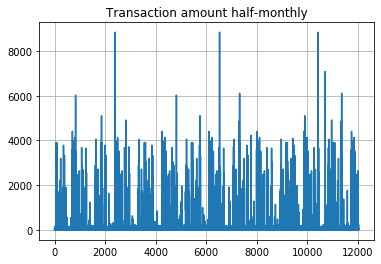

In [28]:
#Plotting the transaction amount half monthly
data['amount'].plot(grid=True)
plt.title("Transaction amount half-monthly")

Text(0.5, 1.0, 'Average transaction amount every month')

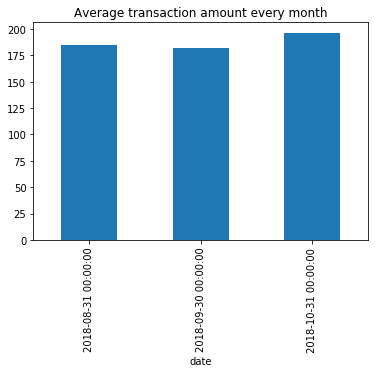

In [29]:
#Setting the datetime as index column and plotting the average amount of every month

data.set_index('date',inplace=True)
data['amount'].resample(rule='M').mean().plot(kind='bar')
plt.title("Average transaction amount every month")

Text(0.5, 1.0, 'Maximum transaction amount every week')

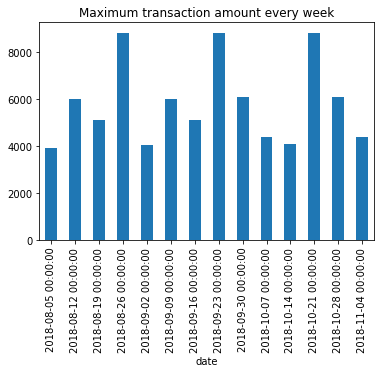

In [30]:
#Plotting the maximum transaction amount of every week
data['amount'].resample(rule='W').max().plot(kind='bar')
plt.title("Maximum transaction amount every week")

date
2018-08-31    729935.52
2018-09-30    730550.21
2018-10-31    802798.47
Name: amount, dtype: float64


Text(0.5, 1.0, 'Monthly total transaction amount')

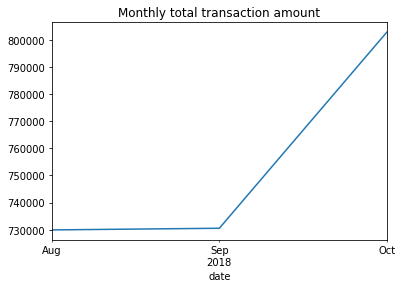

In [31]:
#Calculating and plotting the monthly total transaction amount
total_tran_monthly=data['amount'].resample(rule='M').sum().sort_values()
print(total_tran_monthly)
total_tran_monthly.plot()
plt.title("Monthly total transaction amount")

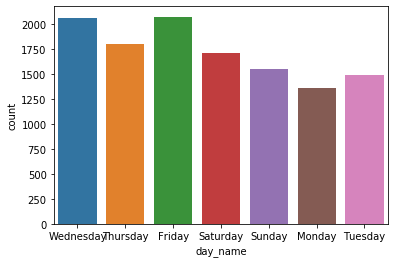

In [32]:
#Counting the number of transactions done on day basis

sns.countplot(x='day_name',data=data)

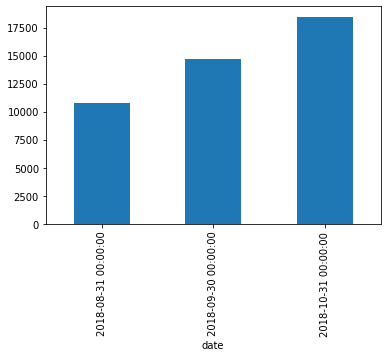

In [33]:
#Plotting the average balance of every month in increasing order

data['balance'].resample(rule='M').mean().plot(kind='bar')

In [34]:
#Grouping the data by datetime and aggregating with the number of transactions done at that particular time

data_time=data.groupby('extraction').agg({'account': lambda x:len(x)})

In [35]:
#Viewing the first 15 rows 

data_time.head(15)

,account
extraction,
2018-08-01 01:01:15+00:00,1
2018-08-01 01:13:45+00:00,1
2018-08-01 01:26:15+00:00,1
2018-08-01 01:38:45+00:00,1
2018-08-01 01:51:15+00:00,1
2018-08-01 02:00:00+00:00,1
2018-08-01 02:23:04+00:00,1
2018-08-01 04:11:25+00:00,1
2018-08-01 04:40:00+00:00,1


extraction
2018-08-31 00:00:00+00:00    3943
2018-09-30 00:00:00+00:00    4013
2018-10-31 00:00:00+00:00    4087
Freq: M, Name: account, dtype: int64

 On an average, Number of transactions customers make each month: 4014.3333333333335


Text(0.5, 1.0, 'Number of transactions each month')

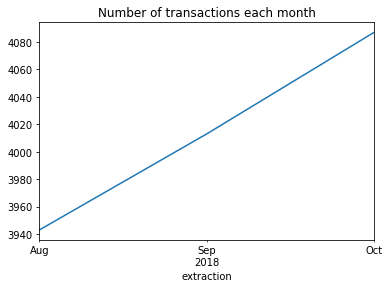

In [36]:
#Plotting the number of transactions made by customers every month

num_of_mon_tran=data_time['account'].resample(rule='M').sum()
print(num_of_mon_tran)
print("\n On an average, Number of transactions customers make each month:",num_of_mon_tran.mean())
num_of_mon_tran.plot(kind='line')
plt.title("Number of transactions each month")

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64


Text(0.5, 1.0, 'Number of transactions of Top Five Customers')

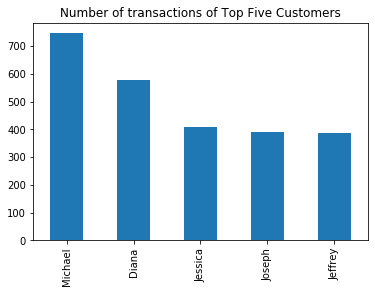

In [37]:
#First five customers with the maximum number of transactions

max_num_trans_cus=data['first_name'].value_counts()
print(max_num_trans_cus.head(5))
max_num_trans_cus.head(5).plot(kind='bar')
plt.title("Number of transactions of Top Five Customers")

In [38]:
#Details of the customer with the maximum number of transactions

data[data['first_name']=='Michael'].head(1)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,gender,age,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,day_name
date,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,M,38,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,Wednesday


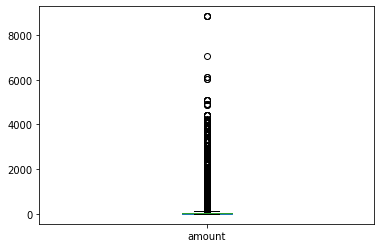

In [39]:
#Univariate analysis - Box plot
data['amount'].plot.box()

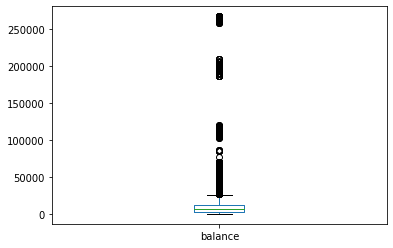

In [40]:
data['balance'].plot.box()

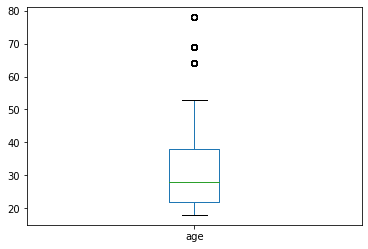

In [41]:
data['age'].plot.box()

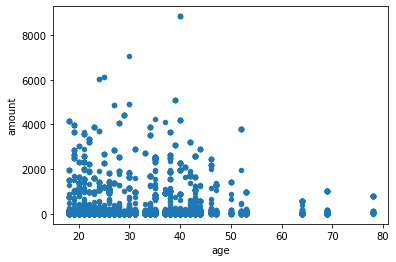

In [42]:
#Bivariate Analysis - scatter plot
data.plot(x='age',y='amount',kind='scatter')

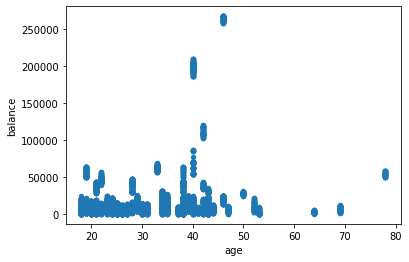

In [43]:
data.plot(x='age',y='balance',kind='scatter')

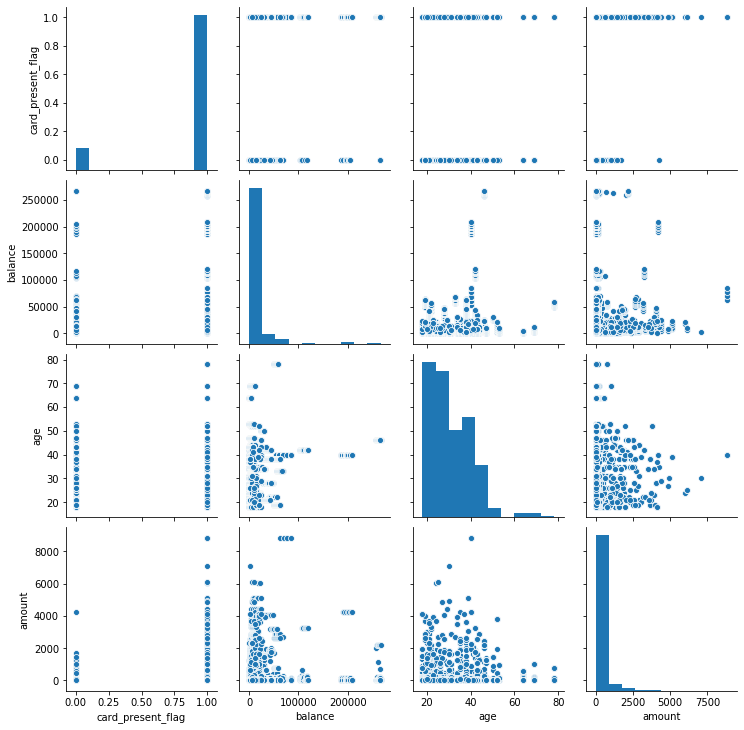

In [44]:
#Plotting the pairwise relationship of numerical features

sns.pairplot(data)

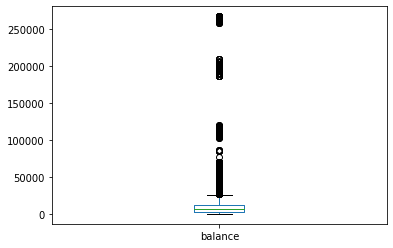

In [45]:
data['balance'].plot.box()

In [46]:
#Outlier Treatment 
#Datapoints from age and amount column were removed whereas balance above 50000 i.e. 647 customers' balance was replaced by their mean.

#age=data[data['age']>60]
#print(len(age))
#amo=data[data['amount']>6000]
#print(len(amo))
#len(data[data['balance']>50000])

data=data[data['age']<60] 
data=data[data['amount']<6000]
data.loc[data['balance']>50000,'balance']=np.mean(data['balance'])

In [47]:
#Dropping the day_name column from the dataset after analysis

data=data.drop('day_name',axis=1)

In [48]:
#Viewing the shape of the dataset after outlier treatment and removal of the extra column created

data.shape

(11810, 17)

# Predictive Modelling


In [49]:
data_salary=data[data['txn_description']=='PAY/SALARY']

In [50]:
data_salary.shape


(836, 17)

In [51]:
#Creating a new column with the amount credited as salary and dropping the amount column 
data_salary['annual_salary']=data_salary['amount']
data_salary=data_salary.drop(['amount'],axis=1)

C:\Users\Dipanjan Dey Sarkar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
#Removing the columns having only id details and other columns having only one category - which will return 1's in all the rows.

cols=['account','long_lat','txn_description','first_name','extraction','transaction_id','country','customer_id','card_present_flag','currency','merchant_state','movement','status']

In [53]:
data_salary=data_salary.drop(cols,axis=1)

In [54]:
data_salary.dtypes

balance          float64
gender            object
age                int64
annual_salary    float64
dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler

data_salary=pd.get_dummies(data_salary)
scalar=StandardScaler()
sc_cols=['balance','age','annual_salary']
scalar.fit_transform(data_salary[sc_cols])
print(data_salary.shape)

(836, 5)


gender_F        -0.174466
age             -0.027114
gender_M         0.174466
balance          0.311539
annual_salary    1.000000
Name: annual_salary, dtype: float64


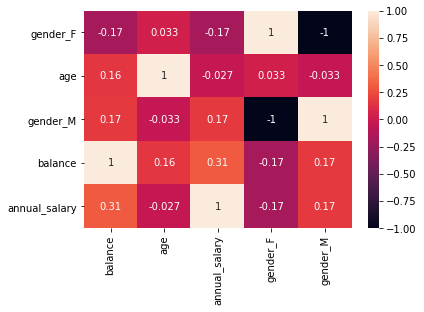

In [56]:
#Plotting a heatmap of the correlation between the features
corr=data_salary.corr()
corr.sort_values(['annual_salary'],ascending=True,inplace=True)
print(corr['annual_salary'])
sns.heatmap(corr,annot=True)

In [57]:
X=data_salary.drop('annual_salary',axis=1)
Y=data_salary['annual_salary']

In [58]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LRmodel=LinearRegression()
LRmodel.fit(X_train,Y_train)
y_pred=LRmodel.predict(x_test)
LinReg=LRmodel.score(x_test,y_test)
print("Score using Linear Regression",LinReg)
print("RMSE",np.sqrt(mean_squared_error(y_pred,y_test)))

Score using Linear Regression 0.08696761489113602
RMSE 944.7272150989868


In [77]:
from sklearn.linear_model import Ridge

Rmodel=Ridge()
Rmodel.fit(X_train,Y_train)
y_pred=Rmodel.predict(x_test)
Ridge=Rmodel.score(x_test,y_test)
print("Score using Ridge:",Ridge)
print("RMSE on test data:",np.sqrt(mean_squared_error(y_test,y_pred)))


Score using Ridge: 0.08702443263944548
RMSE on test data: 944.6978195873323


In [78]:
from sklearn.linear_model import ElasticNet

ENmodel=ElasticNet()
ENmodel.fit(X_train,Y_train)
y_pred=ENmodel.predict(x_test)
Elasticnet=ENmodel.score(x_test,y_test)
print("Score using Elastic Net:",Elasticnet)
print("RMSE on test data:",np.sqrt(mean_squared_error(y_test,y_pred)))

Score using Elastic Net: 0.09125232419575979
RMSE on test data: 942.5078843612441


In [79]:
from sklearn.tree import DecisionTreeRegressor

DTmodel=DecisionTreeRegressor()
DTmodel.fit(X_train,Y_train)
y_pred=DTmodel.predict(x_test)
DTReg=DTmodel.score(x_test,y_test)
print("Score using Decision Tree Regressor:",DTReg)
print("RMSE on test data:",np.sqrt(mean_squared_error(y_test,y_pred)))


Score using Decision Tree Regressor: -0.19348398373039055
RMSE on test data: 1080.119067877622


In [80]:
from sklearn.ensemble import RandomForestRegressor

RFmodel=RandomForestRegressor()
RFmodel.fit(X_train,Y_train)
y_pred=RFmodel.predict(x_test)
RFReg=RFmodel.score(x_test,y_test)
print("Score using Random Forest Regressor:",RFReg)
print("RMSE on test data",np.sqrt(mean_squared_error(y_test,y_pred)))

Score using Random Forest Regressor: 0.39980922415377124
RMSE on test data 765.9633565795738


In [81]:
from xgboost import XGBRegressor

XGmodel=XGBRegressor()
XGmodel.fit(X_train,Y_train)
y_pred=XGmodel.predict(x_test)
XGReg=XGmodel.score(x_test,y_test)
print("Score using XGBoost:",XGReg)
print("RMSE on test data",np.sqrt(mean_squared_error(y_test,y_pred)))

Score using XGBoost: 0.4823323397873538
RMSE on test data 711.359036196389


# Hyper parameter tuning of XGBoost 

Since XGBoost regressor has the highest score, hyperparameter tuning is done to further minimize the loss function 'Root Mean Squared Error' on the test data, used as performance metrics for better performance of the model. We will use RandomizedSearchCV as it will take less computational time than GridSearchCV because XGboost has many parameters.

In [82]:
from sklearn.model_selection import RandomizedSearchCV

booster=['gblinear','gbtree']
learning_rate=[0.001,0.01,0.1,0.2,0.5]
n_estimators=[50,100,150,200,250]
max_depth=[2,4,6,8,10]
param_grid=dict(max_depth=max_depth,n_estimators=n_estimators,booster=booster,learning_rate=learning_rate)

random_search=RandomizedSearchCV(XGmodel,param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
result=random_search.fit(X_train,Y_train)
print("Best: %f using %s"%(result.best_score_,result.best_params_))

Best: -551046.716130 using {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'booster': 'gbtree'}


In [83]:
print(result.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [85]:
final_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
final_model.fit(X_train,Y_train)
y_final_pred=final_model.predict(x_test)
print("Score after hyperparameter tuning using XGBoost:",final_model.score(x_test,y_test))
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test,y_final_pred)))

Score after hyperparameter tuning using XGBoost: 0.554187165110812
RMSE on test data: 660.145426965457


# Comparison

1)Analysis and visualisation of latitude and longitude needs to be done for gaining more information about the customers' locations.
2)More features need to be engineered and fetched for increasing the efficiency of the business model.
